<a href="https://colab.research.google.com/github/daurice/capstone/blob/main/Doris_Mugah_Group_26_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
#Importing numpy,matplotlib,pandas and seaborn libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn_pandas
from sklearn.preprocessing import RobustScaler
from scipy.stats import skew
from scipy.special import boxcox1p

In [300]:
#using pandas to read the churn dataframe
df = pd.read_csv('/content/Churn_Modelling_26.csv')

#print the churn dataframe
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0.0


In [301]:
#analyzing the data types
df.dtypes

RowNumber          float64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
Unnamed: 11        float64
HasCrCard           object
IsActiveMember      object
Churn              float64
dtype: object

Cleaning data


In [302]:
# Drop NaN values from specific columns
df = df.dropna(subset=['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn'])

# Impute NaN values in the specified columns with their mean
df[['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn']] = df[['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn']].fillna(df[['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn']].mean())

# Convert specified columns to integer type
df[['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn']] = df[['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn']].astype(int)


# Check the data types after conversion
print(df.dtypes)



RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
EstimatedSalary    float64
Unnamed: 11        float64
HasCrCard           object
IsActiveMember      object
Churn                int64
dtype: object


<ipython-input-302-f396bf6f7987>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn']] = df[['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn']].fillna(df[['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn']].mean())
<ipython-input-302-f396bf6f7987>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Age', 'RowNumber', 'CustomerId', 'CreditScore', 'NumOfProducts', 'Churn']] = df[['Age'

In [303]:
df.to_csv('Churn_Modelnew.csv', index=False)

Changing Object to category

In [304]:

#changing dtype object to category
obj_cols = df.select_dtypes(include=['object'])
df[obj_cols.columns] =obj_cols.astype('category')
#changing dtype object to category

print(df.dtypes)

RowNumber             int64
CustomerId            int64
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure              float64
Balance             float64
NumOfProducts         int64
EstimatedSalary     float64
Unnamed: 11         float64
HasCrCard          category
IsActiveMember     category
Churn                 int64
dtype: object


<ipython-input-304-c9d61d9981c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[obj_cols.columns] =obj_cols.astype('category')


In [305]:
#checking for the changes on df
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,101348.88,NaN,Yes,Yes,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,112542.58,NaN,No,Yes,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,113931.57,NaN,Yes,No,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,93826.63,NaN,No,No,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,79084.10,NaN,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,96270.64,NaN,Yes,No,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,101699.77,NaN,Yes,Yes,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,42085.58,NaN,No,Yes,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,92888.52,NaN,Yes,No,1


In [306]:
#checking for nan values and printing
nan_vals=df.isna().sum()
print('Nan values in churn:',nan_vals)

Nan values in churn: RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                11
Balance                0
NumOfProducts          0
EstimatedSalary        0
Unnamed: 11        10000
HasCrCard              0
IsActiveMember         0
Churn                  0
dtype: int64


In [307]:
#Removing null values in the Tenure column and filling with the mean
mean_ten =df['Tenure'].mean()
df['Tenure'].fillna(mean_ten,inplace=True)




# Calculate mean of 'Tenure' excluding NaN values
#mean_ten = df['Tenure'].mean()

# Fill missing values in 'Tenure' with the mean
#df['Tenure'] = df['Tenure'].fillna(mean_ten)

# Print DataFrame after filling missing values
print(nan_vals)



RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                11
Balance                0
NumOfProducts          0
EstimatedSalary        0
Unnamed: 11        10000
HasCrCard              0
IsActiveMember         0
Churn                  0
dtype: int64


<ipython-input-307-9075fb151bea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tenure'].fillna(mean_ten,inplace=True)


Validating nan values have been removed

In [308]:
#Validating that the nan values have been removed
nan_vals=df.isna().sum()
print('Nan values in churn:',nan_vals)

Nan values in churn: RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
EstimatedSalary        0
Unnamed: 11        10000
HasCrCard              0
IsActiveMember         0
Churn                  0
dtype: int64


Dropping Unnamed.

In [309]:
#  df is your DataFrame
unnamed_columns = [col for col in df.columns if col.startswith('Unnamed')]
df = df.drop(columns=unnamed_columns)

# This will drop all columns with names starting with 'Unnamed'

print(nan_vals)


RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
EstimatedSalary        0
Unnamed: 11        10000
HasCrCard              0
IsActiveMember         0
Churn                  0
dtype: int64


Checking for Dupicates

In [310]:
#checking for duplicates
dups = df[df.duplicated()]
#view duplicated rows
if  not dups.empty:
  print('duplicated rows:',dups)
else:
  print('no duplicates were found')

no duplicates were found


In [311]:
if (duplicated := df.duplicated(keep=False)).any():
    some_duplicates = df[duplicated].sort_values(by=df.rows.to_list()).head()
    print(f"Dataframe has one or more duplicated rows, for example:\n{some_duplicates}")
else:
    print('no duplicates')

no duplicates


Checking for outliers.

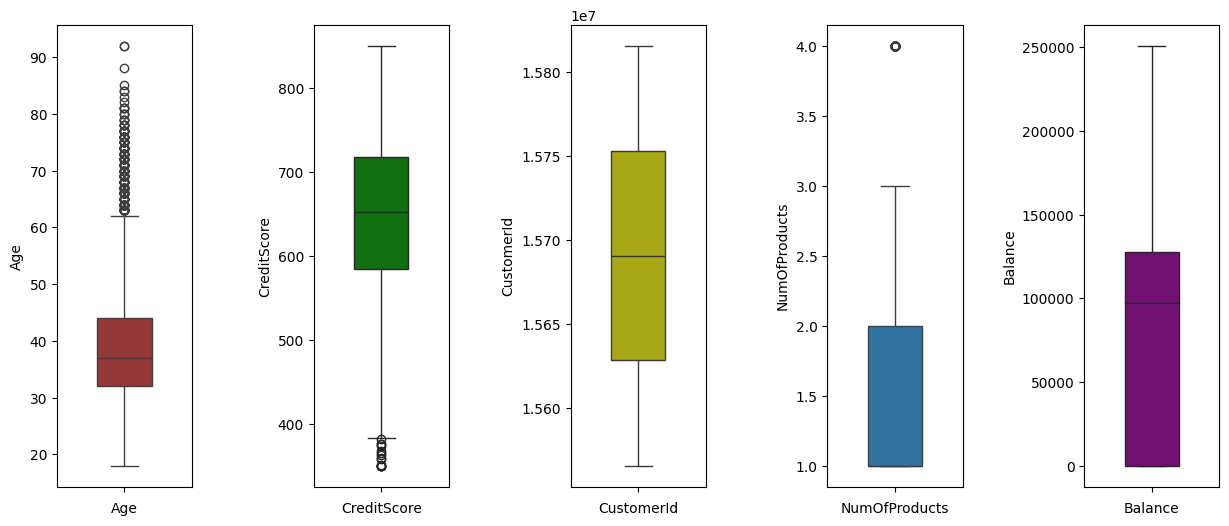

In [312]:
# Initialize figure with 5 subplots in a row
fig, ax = plt.subplots(1, 5, figsize=(15, 6))

# Add padding between the subplots
plt.subplots_adjust(wspace=0.9)

# Draw boxplot for 'Age' in the 1st subplot
sns.boxplot(data=df['Age'], ax=ax[0], color='brown',width=0.4)
ax[0].set_xlabel('Age')

# Draw boxplot for 'CreditScore' in the 2nd subplot
sns.boxplot(data=df['CreditScore'], ax=ax[1], color='g', width=0.4)
ax[1].set_xlabel('CreditScore')

# Draw boxplot for 'CustomerId' in the 3rd subplot
sns.boxplot(data=df['CustomerId'], ax=ax[2], color='y', width=0.4)
ax[2].set_xlabel('CustomerId')

# Draw boxplot for 'NumOfProducts' in the 4th subplot
sns.boxplot(data=df['NumOfProducts'], ax=ax[3], width=0.4)
ax[3].set_xlabel('NumOfProducts')

# Finally, draw boxplot for 'Balance' in the 5th subplot
sns.boxplot(data=df['Balance'], ax=ax[4], color='purple',width=0.4)
ax[4].set_xlabel('Balance')

# Remove x-tick labels in each subplot
#for subplot in ax:
    #subplot.set_xticklabels([])

plt.show()

Removing outliers.

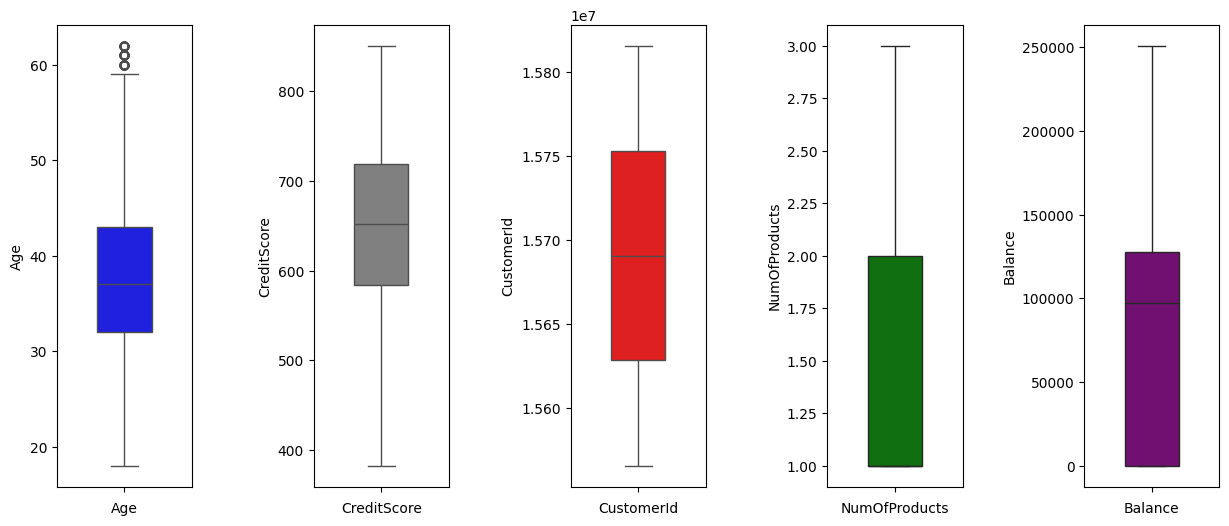

In [313]:
# Initialize figure with 5 subplots in a row
fig, ax = plt.subplots(1, 5, figsize=(15, 6))

# Add padding between the subplots
plt.subplots_adjust(wspace=0.9)

def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]



# Draw boxplot for 'Age' in the 1st subplot
sns.boxplot(data=remove_outliers_iqr(df['Age']), ax=ax[0], color='blue',width=0.4)
ax[0].set_xlabel('Age')

# Draw boxplot for 'CreditScore' in the 2nd subplot
sns.boxplot(data=remove_outliers_iqr(df['CreditScore']), ax=ax[1], color='grey', width=0.4)
ax[1].set_xlabel('CreditScore')

# Draw boxplot for 'CustomerId' in the 3rd subplot
sns.boxplot(data=remove_outliers_iqr(df['CustomerId']), ax=ax[2], color='red', width=0.4)
ax[2].set_xlabel('CustomerId')

# Draw boxplot for 'NumOfProducts' in the 4th subplot
sns.boxplot(data=remove_outliers_iqr(df['NumOfProducts']), ax=ax[3], color='green', width=0.4)
ax[3].set_xlabel('NumOfProducts')

# Finally, draw boxplot for 'Balance' in the 5th subplot
sns.boxplot(data=remove_outliers_iqr(df['Balance']), ax=ax[4], color='purple',width=0.4)
ax[4].set_xlabel('Balance')

# Remove x-tick labels in each subplot
for subplot in ax:
    subplot.set_xticklabels([])

plt.show()


Countplot for Categorical features



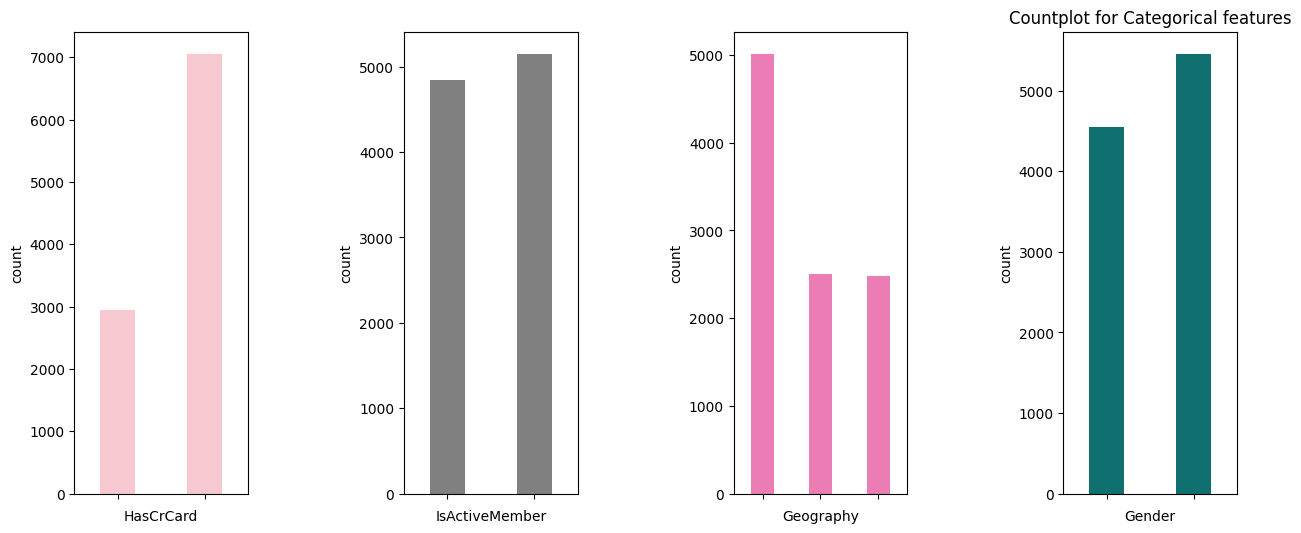

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(15, 6))

# Add padding between the subplots
fig.subplots_adjust(wspace=0.9)
plt.title('Countplot for Categorical features', loc='center')

# Draw countplot for 'HasCrCard' in the 1st subplot
sns.countplot(data=df, x='HasCrCard', ax=ax[0], color='pink', width=0.4)
ax[0].set_xlabel('HasCrCard')
ax[0].set_xticklabels([])

# Draw countplot for 'IsActiveMember' in the 2nd subplot
sns.countplot(data=df, x='IsActiveMember', ax=ax[1], color='grey', width=0.4)
ax[1].set_xlabel('IsActiveMember')
ax[1].set_xticklabels([])

# Draw countplot for 'Geography' in the 3rd subplot
sns.countplot(data=df, x='Geography', ax=ax[2],color='hotpink', width=0.4)
ax[2].set_xlabel('Geography')
ax[2].set_xticklabels([])

# Finally, draw countplot for 'Gender' in the 4th subplot
sns.countplot(data=df, x='Gender', ax=ax[3], color='teal', width=0.4)
ax[3].set_xlabel('Gender')
ax[3].set_xticklabels([])

# Show the plot
plt.show()


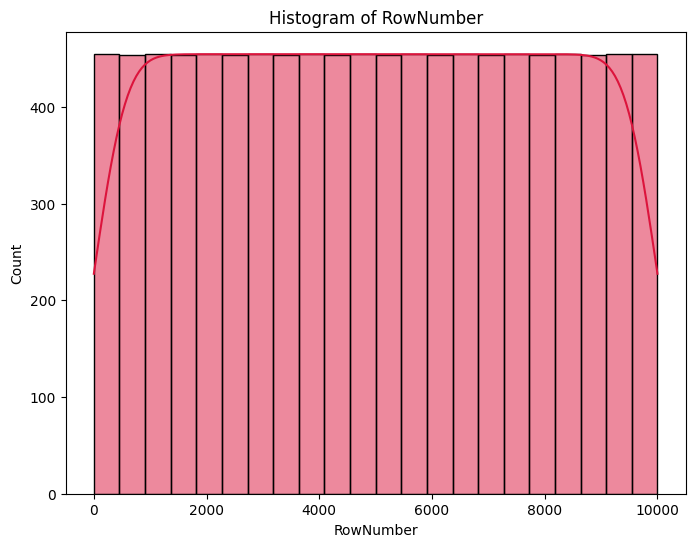

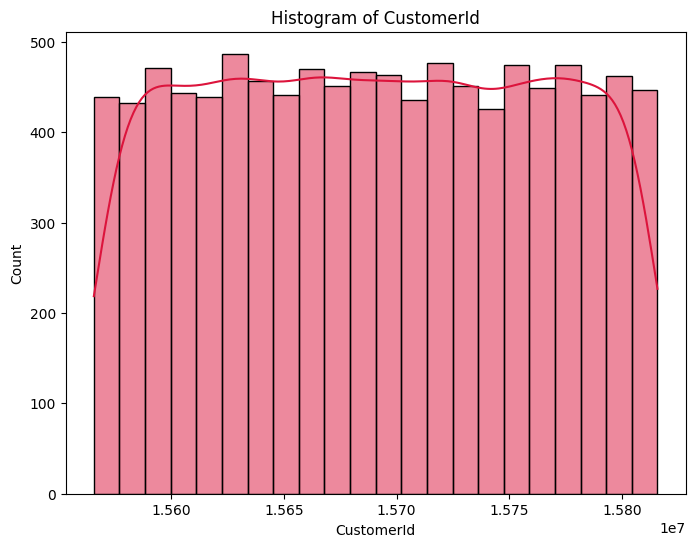

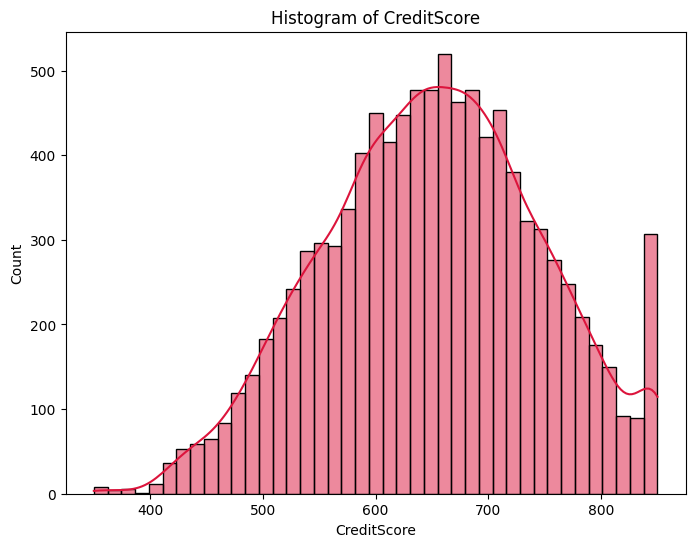

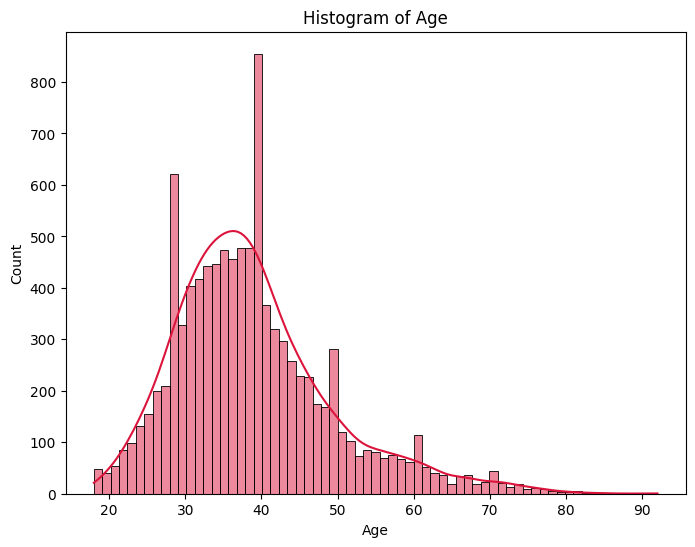

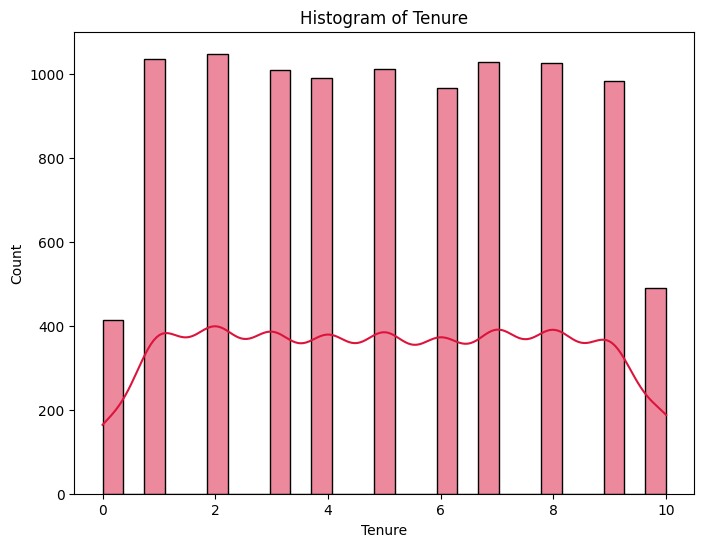

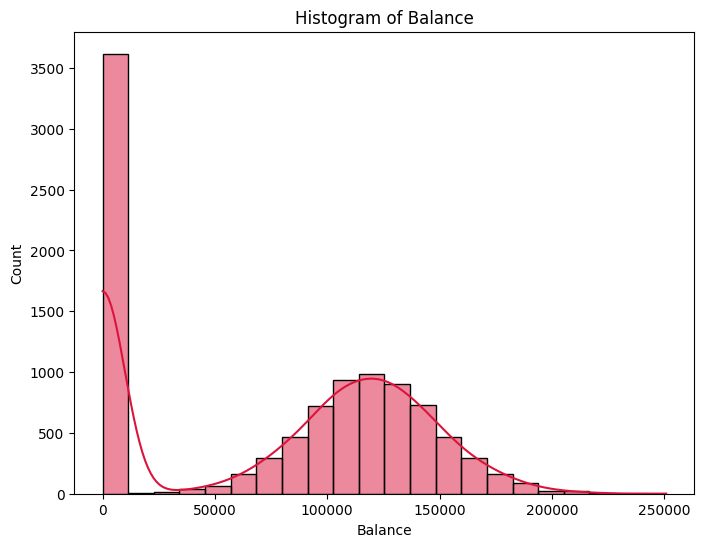

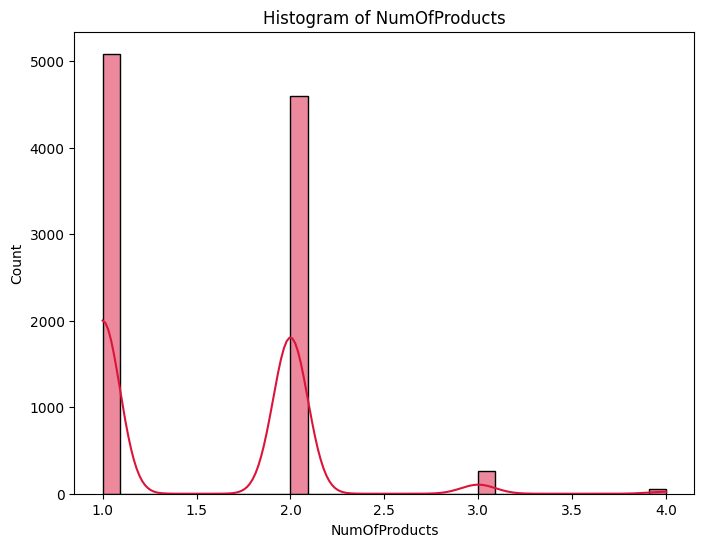

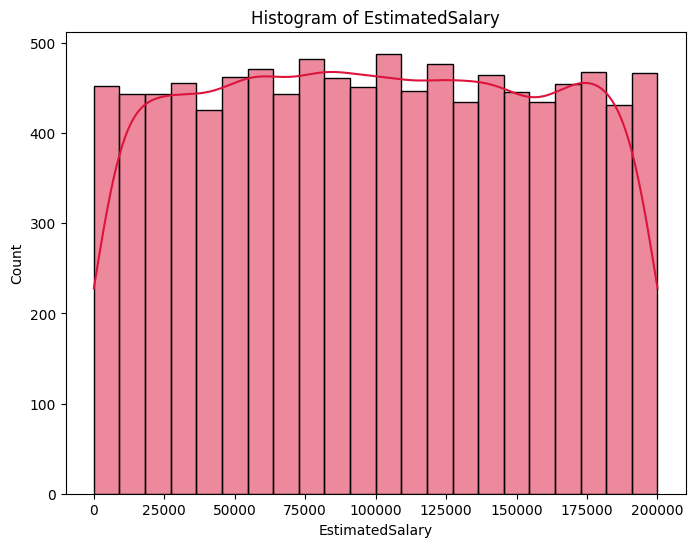

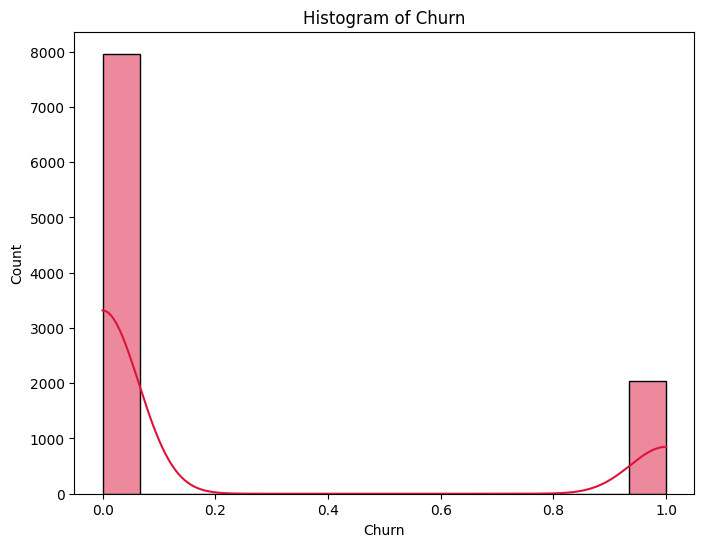

In [315]:
# Draw histograms for numeric features
numeric_features = df.select_dtypes(include=[np.float64, np.int64]).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True, color='crimson')
    plt.title(f'Histogram of {feature}')
    plt.show()

# Compute skewness of variables
skewness = df[numeric_features].apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.5]  # Filtering out variables with high skewness

# Apply transformation function if needed
skewed_features = skewness.index
for feature in skewed_features:
    df[feature] = boxcox1p(df[feature], 0.15)  # Applying box-cox transformation

# Recalculate skewness after transformation
skewness_after_transform = df[skewed_features].apply(lambda x: skew(x.dropna()))

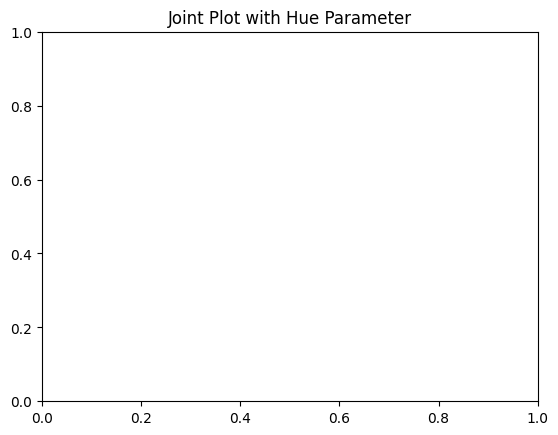

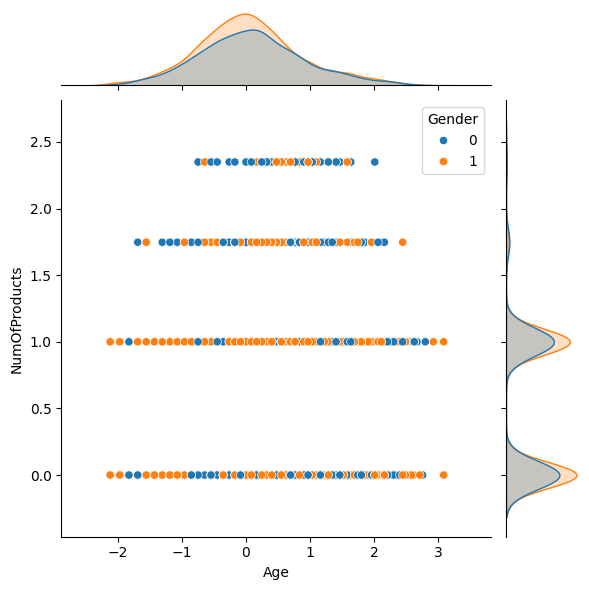

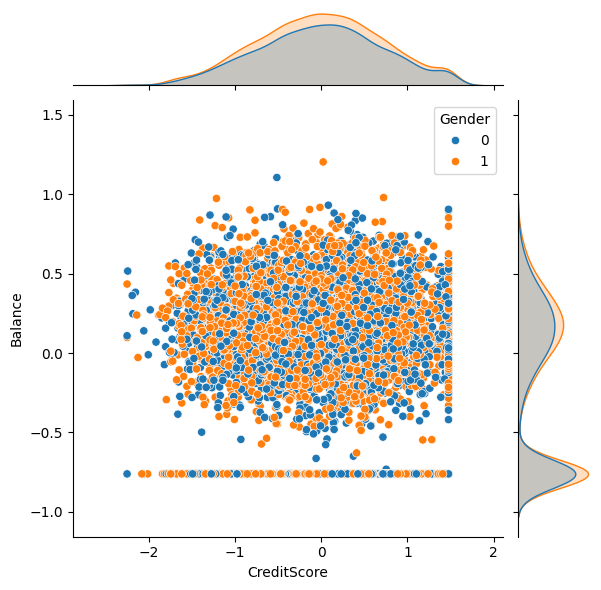

RowNumber          float64
CustomerId         float64
CreditScore        float64
Geography            int64
Gender               int64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
HasCrCard            int64
IsActiveMember       int64
Churn              float64
dtype: object

In [322]:
#jointplot using hue parameter
#sns.jointplot(x='Age', y='NumOfProducts', data=df, hue='Gender', kind='hist')
plt.title("Joint Plot with Hue Parameter")
#plt.show()
sns.jointplot(x='Age', y='NumOfProducts', data=df, hue='Gender', kind='scatter')
plt.show()
sns.jointplot(x='CreditScore', y='Balance', data=df, hue='Gender', kind='scatter')
plt.show()
df.dtypes

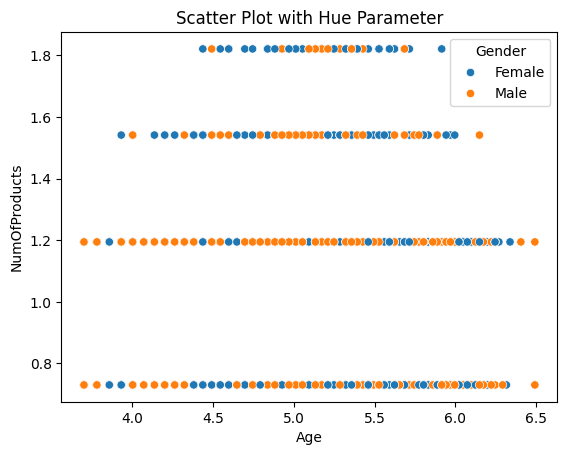

In [317]:
sns.scatterplot(x='Age', y='NumOfProducts', data=df, hue='Gender')
plt.title("Scatter Plot with Hue Parameter")
plt.show()

In [318]:

# Select numeric features
numeric_features = df.loc[:, df.dtypes.isin(['float64', 'int64'])]

# Apply RobustScaler
scaler = RobustScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Convert scaled features back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns, index=numeric_features.index)

# Replace original numeric features with scaled ones
df.loc[:, numeric_features.columns] = scaled_df

# Now data contains scaled numeric features
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender       Age  \
0    -1.0000   -0.450149  Hargrave    -0.246269    France  Female  0.401393   
1    -0.9998   -0.348236      Hill    -0.328358     Spain  Female  0.324412   
2    -0.9996   -0.572822      Onio    -1.119403    France  Female  0.401393   
3    -0.9994    0.085129      Boni     0.350746    France  Female  0.165654   
4    -0.9992    0.378091  Mitchell     1.477612     Spain  Female  0.476868   

   Tenure   Balance  NumOfProducts  EstimatedSalary HasCrCard IsActiveMember  \
0   -0.75 -0.761480       0.000000         0.011739       Yes            Yes   
1   -1.00 -0.104906       0.000000         0.125512        No            Yes   
2    0.75  0.489346       1.747314         0.139630       Yes             No   
3   -1.00 -0.761480       1.000000        -0.064717        No             No   
4   -0.75  0.221806       0.000000        -0.214561       Yes            Yes   

      Churn  
0  0.730463  
1  0.000000  
2 

In [319]:

from sklearn.preprocessing import LabelEncoder



# Separate non-numeric features
non_numeric_features = df.select_dtypes(exclude=['float64', 'int64'])

# Option 1: Delete the column
 #df.drop(non_numeric_features.columns, axis=1, inplace=True)

# Option 2: Convert non-numeric features to numeric ones using appropriate encoding techniques
for column in non_numeric_features.columns:
    if non_numeric_features[column].nunique() > 10:
        # If the number of unique categories is large, it's better to delete the column
        df.drop(column, axis=1, inplace=True)
    else:
        # Otherwise, use label encoding
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])

# Now df contains numeric features
print(df.head())

   RowNumber  CustomerId  CreditScore  Geography  Gender       Age  Tenure  \
0    -1.0000   -0.450149    -0.246269          0       0  0.401393   -0.75   
1    -0.9998   -0.348236    -0.328358          2       0  0.324412   -1.00   
2    -0.9996   -0.572822    -1.119403          0       0  0.401393    0.75   
3    -0.9994    0.085129     0.350746          0       0  0.165654   -1.00   
4    -0.9992    0.378091     1.477612          2       0  0.476868   -0.75   

    Balance  NumOfProducts  EstimatedSalary  HasCrCard  IsActiveMember  \
0 -0.761480       0.000000         0.011739          1               1   
1 -0.104906       0.000000         0.125512          0               1   
2  0.489346       1.747314         0.139630          1               0   
3 -0.761480       1.000000        -0.064717          0               0   
4  0.221806       0.000000        -0.214561          1               1   

      Churn  
0  0.730463  
1  0.000000  
2  0.730463  
3  0.000000  
4  0.000000  


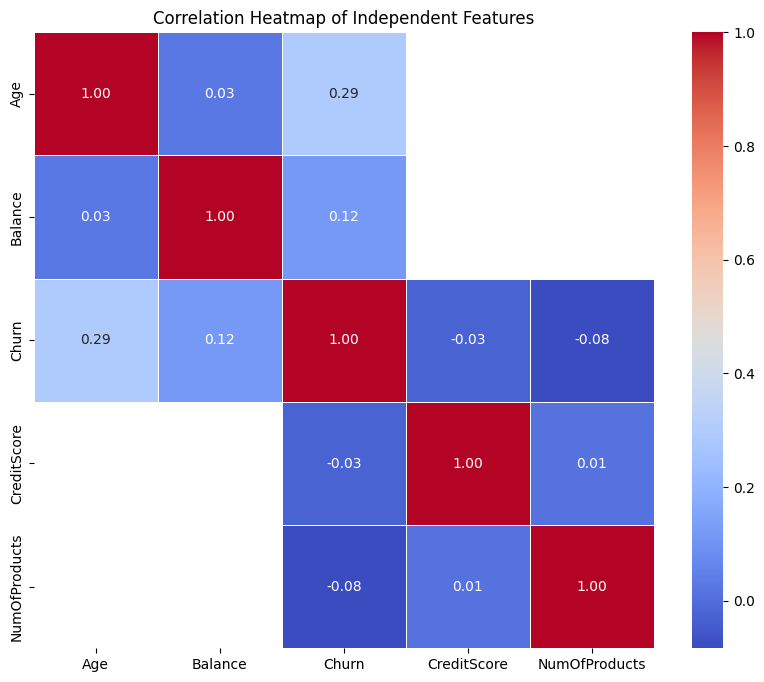

Correlation of each independent feature with 'Churn':
Age              0.294115
Balance          0.118533
CreditScore     -0.027094
NumOfProducts   -0.083392
dtype: float64

Top 5 most important independent features:
Index(['Age', 'Balance', 'NumOfProducts', 'CreditScore'], dtype='object')


In [320]:


# Define DataFrames for section 3(b) and section 3(c)
df_b = pd.DataFrame(df[['Age', 'Balance', 'Churn']])
df_c = pd.DataFrame(df[['CreditScore', 'NumOfProducts', 'Churn']])

# Combine the datasets
combined_df = pd.concat([df_b, df_c], axis=0)

# Compute correlation among all independent features
correlation_matrix = combined_df.corr()

# Calculate correlation of each independent feature with 'Churn'
correlation_with_churn = combined_df.drop(columns=['Churn']).apply(lambda x: x.corr(combined_df['Churn']))

# Select 5 most important independent features based on their correlation with 'Churn'
top_5_features = correlation_with_churn.abs().nlargest(5).index

# Display the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Independent Features")
plt.show()

# Display correlation of each independent feature with 'Churn'
print("Correlation of each independent feature with 'Churn':")
print(correlation_with_churn)

# Display the 5 most important independent features
print("\nTop 5 most important independent features:")
print(top_5_features)


In [321]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features to be within [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SelectKBest with chi-squared scoring function and k=5
selector = SelectKBest(score_func=chi2, k=5)

# Fit SelectKBest to training data
selector.fit(X_train_scaled, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Transform training and testing data to keep only the selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Print the names of the selected features
print("Selected features:", selected_features)



ValueError: Unknown label type: (array([0.        , 0.        , 0.73046315, ..., 0.73046315, 0.73046315,
       0.        ]),)